In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=7f6636d372b0a550dd6ca900059e5c9f09f1223f830db280160931a762539e9f
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

6.0


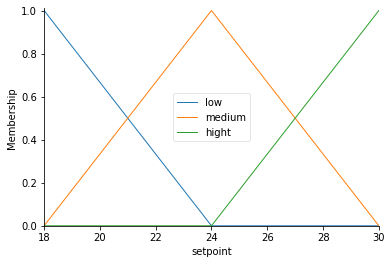

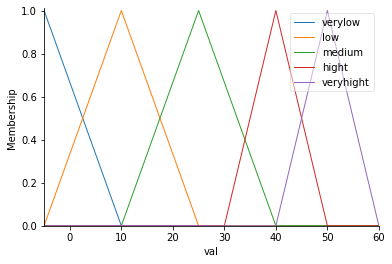

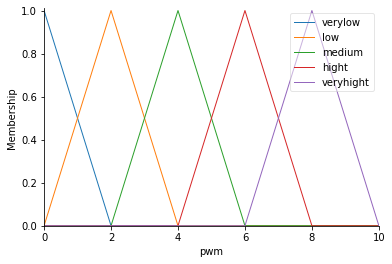

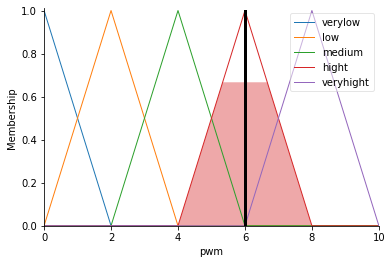

In [4]:
setpoint=ctrl.Antecedent(np.arange(18,31,1),'setpoint')
val=ctrl.Antecedent(np.arange(-5,61,1),'val')
pwm=ctrl.Consequent(np.arange(0,11,1),'pwm')


setpoint['low']=fuzz.trimf(setpoint.universe,[18,18,24])
setpoint['medium']=fuzz.trimf(setpoint.universe,[18,24,30])
setpoint['hight']=fuzz.trimf(setpoint.universe,[24,30,30])

val['verylow']=fuzz.trimf(val.universe,[-5,-5,10])
val['low']=fuzz.trimf(val.universe,[-5,10,25])
val['medium']=fuzz.trimf(val.universe,[10,25,40])
val['hight']=fuzz.trimf(val.universe,[30,40,50])
val['veryhight']=fuzz.trimf(val.universe,[40,50,60])

pwm['verylow']=fuzz.trimf(pwm.universe,[0,0,2])
pwm['low']=fuzz.trimf(pwm.universe,[0,2,4])
pwm['medium']=fuzz.trimf(pwm.universe,[2,4,6])
pwm['hight']=fuzz.trimf(pwm.universe,[4,6,8])
pwm['veryhight']=fuzz.trimf(pwm.universe,[6,8,10])

rule1=ctrl.Rule(setpoint['low']&val['verylow'],pwm['verylow'])
rule2=ctrl.Rule(setpoint['low']&val['low'],pwm['verylow'])
rule3=ctrl.Rule(setpoint['low']&val['medium'],pwm['verylow'])
rule4=ctrl.Rule(setpoint['low']&val['hight'],pwm['low'])
rule5=ctrl.Rule(setpoint['low']&val['veryhight'],pwm['hight'])
rule6=ctrl.Rule(setpoint['medium']&val['verylow'],pwm['low'])
rule7=ctrl.Rule(setpoint['medium']&val['low'],pwm['low'])
rule8=ctrl.Rule(setpoint['medium']&val['medium'],pwm['medium'])
rule9=ctrl.Rule(setpoint['medium']&val['hight'],pwm['medium'])
rule10=ctrl.Rule(setpoint['medium']&val['veryhight'],pwm['veryhight'])
rule11=ctrl.Rule(setpoint['hight']&val['verylow'],pwm['low'])
rule12=ctrl.Rule(setpoint['hight']&val['low'],pwm['medium'])
rule13=ctrl.Rule(setpoint['hight']&val['medium'],pwm['hight'])
rule14=ctrl.Rule(setpoint['hight']&val['hight'],pwm['hight'])
rule15=ctrl.Rule(setpoint['hight']&val['veryhight'],pwm['veryhight'])

setpoint.view()
val.view()
pwm.view()

pwming_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwming=ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['setpoint']=30
pwming.input['val']=30
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)




